# Übung 10

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### In dieser Übung ...

... werden wir intensiv mit einem Datensatz arbeiten und uns mit ihm vertraut machen.

### 10.0 Lehrevaluation

Bitte nehmen Sie an der Evaluation dieser Veranstaltung teil.

* Bitte schreiben Sie keine Kommentare in dieses Jupyter Notebook. Die Evaluation erfolgt über den üblichen Weg und Sie haben dazu bereits eine Einladung erhalten.

**Hintergrund**

Ihre (anonymen) Rückmeldungen in Lehrevaluationen helfen mir und meinen Kolleginnen und Kollegen dabei, ein Bild darüber zu erhalten, wie die Veranstaltungen im Rahmen der Corona-Pandemie gelaufen sind, was gut funktioniert hat und was noch verbessert werden kann.

Wichtig zu wissen: Ihre Rückmeldungen gehören zu den wichtigsten Datensätzen, mit dem innerhalb der Professorenschaft über die Qualität und Ausrichtung der Lehre diskutiert wird und mit dem auch über Konzepte argumentiert wird. Durch Ihre Rückmeldungen üben Sie aktiv Einfluss auf diese Diskussionen aus.

### 10.1 Datenaufbereitung (Corona Pandemie)

In dieser Übungsaufgabe wird es darum gehen, weitere Praxiserfahrung bei der Datenaufbereitung zu sammeln. Wie Sie im Rahmen der Veranstaltung gelernt haben, lässt sich Datenaufbereitung nur schwer auf Vorlesungsfolien vermitteln, sondern muss praktisch geübt werden. Sie werden Daten der Corona-Pandemie analysieren. Die Daten stammen vom Robert Koch Institut.

- Ziel dieser Übung ist es, den Datensatz des Robert Koch Instituts so aufzubereiten, dass Sie am Ende einen Pandas DataFrame vorliegen haben, der die Anzahl Neuinfizierter pro Tag und Bundesland enthält.

**Ihre Aufgaben**


(1) Sie finden den Datensatz des Robert Koch Instituts unter folgendem Link: [https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/e408ccf8878541a7ab6f6077a42fd811_0/explore](https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/e408ccf8878541a7ab6f6077a42fd811_0/explore). Falls die Daten nicht abrufbar sein sollten, verwenden Sie stattdessen einen älteren Stand der Daten, den wir Ihnen [hier](https://data.bialonski.de/ds/RKI_COVID-19.zip) hinterlegt haben.

- Rufen Sie die oben genannte Webseite auf und klicken Sie links auf das Icon (Wolkensymbol) zum Herunterladen des Datensatzes. Laden Sie die Daten als CSV Datei herunter. Falls die Generierung der Datei bei Ihrem Aufruf noch nicht abgeschlossen sein sollte, können Sie sich unter "Download Options" den Stand des Vortages herunterladen.

- Die heruntergeladene Datei ist mehrere hundert Megabytes groß. Um Plattenplatz zu sparen, ist es empfehlenswert, die Datei zu zippen. Die Pandas-Bibliothek, mit der wir die Daten später untersuchen werden, kann [gezippte Dateien direkt importieren](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).


In [1]:
import io
import matplotlib.pyplot as plt
import pandas as pd
import io
import numpy as np
import seaborn as sbn
import seaborn_image as isbn
from matplotlib import pyplot as plt
import ipywidgets as widgets
# from pandas.conftest import axis
from networkx import bipartite_layout
from scipy.ndimage import label
from sklearn.datasets import fetch_olivetti_faces
from skimage.exposure import adjust_gamma
from skimage.exposure import rescale_intensity
from sklearn.datasets import make_swiss_roll
from sklearn.metrics import pairwise_distances
from scipy.sparse.csgraph import shortest_path
from scipy.spatial import distance
from sklearn.neighbors import kneighbors_graph
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from IPython.display import display
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt, rcParams
rcParams['figure.figsize'] = (8, 6)
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt, rcParams
from  scipy.spatial import distance
plt.rcParams["figure.figsize"] = [10, 7]
font =  {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
kwargs = {'edgecolor': "black",  # for edge color
          'linewidth': 2,  # line width of spot
    }

(2) Importieren Sie die Daten in einen Pandas DataFrame, den Sie `df_germany` nennen.

In [2]:
df_germany = pd.read_csv('RKI_COVID-19.zip', compression='zip')
display(df_germany.head(), df_germany.tail())

,IdBundesland,Bundesland,IdLandkreis,Landkreis,Altersgruppe,Altersgruppe2,Geschlecht,Meldedatum,Refdatum,IstErkrankungsbeginn,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,Datenstand,ObjectId
0,1,Schleswig-Holstein,1001,SK Flensburg,A05-A14,Nicht übermittelt,W,2022/01/14 00:00:00+00,2022/01/12 00:00:00+00,1,0,-9,0,1,0,1,"22.03.2022, 00:00 Uhr",1
1,1,Schleswig-Holstein,1001,SK Flensburg,A00-A04,Nicht übermittelt,M,2020/09/30 00:00:00+00,2020/09/30 00:00:00+00,0,0,-9,0,1,0,1,"22.03.2022, 00:00 Uhr",2
2,1,Schleswig-Holstein,1001,SK Flensburg,A05-A14,Nicht übermittelt,W,2022/01/14 00:00:00+00,2022/01/13 00:00:00+00,1,0,-9,0,1,0,1,"22.03.2022, 00:00 Uhr",3
3,1,Schleswig-Holstein,1001,SK Flensburg,A05-A14,Nicht übermittelt,W,2022/01/14 00:00:00+00,2022/01/14 00:00:00+00,0,0,-9,0,2,0,2,"22.03.2022, 00:00 Uhr",4
4,1,Schleswig-Holstein,1001,SK Flensburg,A00-A04,Nicht übermittelt,M,2020/10/29 00:00:00+00,2020/10/29 00:00:00+00,0,0,-9,0,1,0,1,"22.03.2022, 00:00 Uhr",5


,IdBundesland,Bundesland,IdLandkreis,Landkreis,Altersgruppe,Altersgruppe2,Geschlecht,Meldedatum,Refdatum,IstErkrankungsbeginn,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,Datenstand,ObjectId
4447959,16,Thüringen,16077,LK Altenburger Land,unbekannt,Nicht übermittelt,W,2022/02/17 00:00:00+00,2022/02/17 00:00:00+00,0,0,-9,0,1,0,1,"22.03.2022, 00:00 Uhr",4447960
4447960,16,Thüringen,16077,LK Altenburger Land,unbekannt,Nicht übermittelt,W,2022/02/26 00:00:00+00,2022/02/26 00:00:00+00,0,0,-9,-9,1,0,0,"22.03.2022, 00:00 Uhr",4447961
4447961,16,Thüringen,16077,LK Altenburger Land,unbekannt,Nicht übermittelt,W,2022/03/08 00:00:00+00,2022/03/08 00:00:00+00,0,0,-9,-9,2,0,0,"22.03.2022, 00:00 Uhr",4447962
4447962,16,Thüringen,16077,LK Altenburger Land,unbekannt,Nicht übermittelt,W,2022/03/18 00:00:00+00,2022/03/18 00:00:00+00,0,0,-9,-9,3,0,0,"22.03.2022, 00:00 Uhr",4447963
4447963,16,Thüringen,16077,LK Altenburger Land,unbekannt,Nicht übermittelt,W,2022/03/21 00:00:00+00,2022/03/21 00:00:00+00,0,1,-9,-9,1,0,0,"22.03.2022, 00:00 Uhr",4447964


(3) Untersuchen Sie den importierten DataFrame:

- Welche Spalten weist der DataFrame auf?
- Welche Information enthält eine Zeile des DataFrames?
- In welcher Spalte ist die Information über die Anzahl der Neuinfizierten enthalten?

In [4]:
display(df_germany.columns.tolist(), df_germany.info())
# in der Spalte 10 bekam man Info über neue Fälle.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4447964 entries, 0 to 4447963
Data columns (total 18 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   IdBundesland          int64 
 1   Bundesland            object
 2   IdLandkreis           int64 
 3   Landkreis             object
 4   Altersgruppe          object
 5   Altersgruppe2         object
 6   Geschlecht            object
 7   Meldedatum            object
 8   Refdatum              object
 9   IstErkrankungsbeginn  int64 
 10  NeuerFall             int64 
 11  NeuerTodesfall        int64 
 12  NeuGenesen            int64 
 13  AnzahlFall            int64 
 14  AnzahlTodesfall       int64 
 15  AnzahlGenesen         int64 
 16  Datenstand            object
 17  ObjectId              int64 
dtypes: int64(10), object(8)
memory usage: 610.8+ MB


['IdBundesland',
 'Bundesland',
 'IdLandkreis',
 'Landkreis',
 'Altersgruppe',
 'Altersgruppe2',
 'Geschlecht',
 'Meldedatum',
 'Refdatum',
 'IstErkrankungsbeginn',
 'NeuerFall',
 'NeuerTodesfall',
 'NeuGenesen',
 'AnzahlFall',
 'AnzahlTodesfall',
 'AnzahlGenesen',
 'Datenstand',
 'ObjectId']

None

(4) Setzen Sie die Spalte `Meldedatum` auf den Typ datetime Index.

In [7]:
df_germany['Meldedatum'] = pd.to_datetime(df_germany['Meldedatum'])
display(df_germany.head())

,IdBundesland,Bundesland,IdLandkreis,Landkreis,Altersgruppe,Altersgruppe2,Geschlecht,Meldedatum,Refdatum,IstErkrankungsbeginn,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,Datenstand,ObjectId
0,1,Schleswig-Holstein,1001,SK Flensburg,A05-A14,Nicht übermittelt,W,2022-01-14 00:00:00+00:00,2022/01/12 00:00:00+00,1,0,-9,0,1,0,1,"22.03.2022, 00:00 Uhr",1
1,1,Schleswig-Holstein,1001,SK Flensburg,A00-A04,Nicht übermittelt,M,2020-09-30 00:00:00+00:00,2020/09/30 00:00:00+00,0,0,-9,0,1,0,1,"22.03.2022, 00:00 Uhr",2
2,1,Schleswig-Holstein,1001,SK Flensburg,A05-A14,Nicht übermittelt,W,2022-01-14 00:00:00+00:00,2022/01/13 00:00:00+00,1,0,-9,0,1,0,1,"22.03.2022, 00:00 Uhr",3
3,1,Schleswig-Holstein,1001,SK Flensburg,A05-A14,Nicht übermittelt,W,2022-01-14 00:00:00+00:00,2022/01/14 00:00:00+00,0,0,-9,0,2,0,2,"22.03.2022, 00:00 Uhr",4
4,1,Schleswig-Holstein,1001,SK Flensburg,A00-A04,Nicht übermittelt,M,2020-10-29 00:00:00+00:00,2020/10/29 00:00:00+00,0,0,-9,0,1,0,1,"22.03.2022, 00:00 Uhr",5


(5) Erstellen Sie aus dem alten DataFrame einen neuen DataFrame `covid`, der folgende Spalten enthält: 

- Erste Spalte: `Meldedatum`
- 16 weitere Spalten, die jeweils nach einem Bundesland benannt sind 
- letzte Spalte: `Deutschland`

Der DataFrame enthält also die Anzahl der Neuinfizierten pro Tag (Meldedatum) und Bundesland sowie für die gesamte Bundesrepublik (Spalte Deutschland).

- Beachten Sie: Vermutlich werden Sie für die Lösung dieser Teilaufgabe etwas mehr Zeit benötigen und im Internet in der Pandas Dokumentation recherchieren müssen.


,AnzahlFall
Meldedatum,
2020-01-02 00:00:00+00:00,1
2020-01-05 00:00:00+00:00,1
2020-01-23 00:00:00+00:00,1
2020-01-28 00:00:00+00:00,2
2020-01-29 00:00:00+00:00,2


,AnzahlFall
Meldedatum,
2022-03-17 00:00:00+00:00,281769
2022-03-18 00:00:00+00:00,232006
2022-03-19 00:00:00+00:00,123024
2022-03-20 00:00:00+00:00,73228
2022-03-21 00:00:00+00:00,151029


<AxesSubplot:xlabel='Meldedatum', ylabel='Cumulative Sum'>

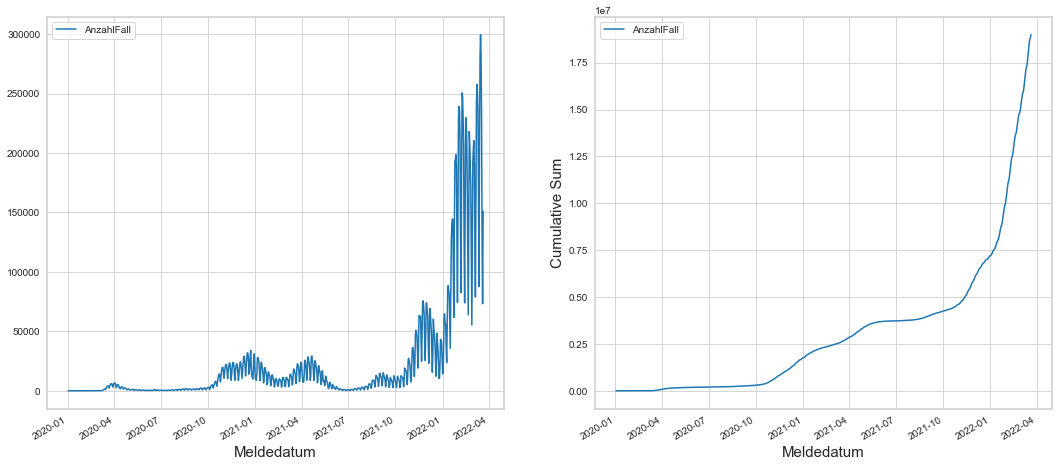

In [30]:
country = df_germany[['Meldedatum', 'AnzahlFall']].groupby('Meldedatum').sum()
display(country.head(), country.tail())
axs = plt.subplots(nrows=1, ncols=2, figsize=(18,8))[1]
country.plot(ax=axs[0])
country.cumsum().plot(ax=axs[1], ylabel='Cumulative Sum' )

In [48]:
bundesweit = df_germany.groupby(['Meldedatum', 'Bundesland'])['AnzahlFall'].sum()
display(bundesweit)
bundesweit = df_germany.groupby(['Meldedatum', 'Bundesland'])['AnzahlFall'].sum().reset_index()
display(bundesweit)


Meldedatum                 Bundesland         
2020-01-02 00:00:00+00:00  Nordrhein-Westfalen       1
2020-01-05 00:00:00+00:00  Nordrhein-Westfalen       1
2020-01-23 00:00:00+00:00  Saarland                  1
2020-01-28 00:00:00+00:00  Bayern                    2
2020-01-29 00:00:00+00:00  Bayern                    2
                                                  ... 
2022-03-21 00:00:00+00:00  Saarland               2183
                           Sachsen                3214
                           Sachsen-Anhalt         3693
                           Schleswig-Holstein     5646
                           Thüringen              5883
Name: AnzahlFall, Length: 11885, dtype: int64

,Meldedatum,Bundesland,AnzahlFall
0,2020-01-02 00:00:00+00:00,Nordrhein-Westfalen,1
1,2020-01-05 00:00:00+00:00,Nordrhein-Westfalen,1
2,2020-01-23 00:00:00+00:00,Saarland,1
3,2020-01-28 00:00:00+00:00,Bayern,2
4,2020-01-29 00:00:00+00:00,Bayern,2
...,...,...,...
11880,2022-03-21 00:00:00+00:00,Saarland,2183
11881,2022-03-21 00:00:00+00:00,Sachsen,3214
11882,2022-03-21 00:00:00+00:00,Sachsen-Anhalt,3693
11883,2022-03-21 00:00:00+00:00,Schleswig-Holstein,5646


In [59]:
states = None
for bundesland in bundesweit['Bundesland'].drop_duplicates():
    nf = bundesweit[bundesweit['Bundesland'] == bundesland].set_index('Meldedatum')
    nf[bundesland] = nf['AnzahlFall']
    nf.drop(['Bundesland', 'AnzahlFall'], axis=1, inplace= True)
    if states is None:
        states = nf
    else:
        states = states.merge(nf, left_index=True, right_index = True, how='outer')

covid = states.merge(country, left_index=True, right_index = True, how='outer')
covid.rename(columns={'AnzahlFall': 'Deutschland'}, inplace= True)
covid.fillna(0, inplace=True)
display(covid.head(), covid.tail())

,Nordrhein-Westfalen,Saarland,Bayern,Niedersachsen,Berlin,Brandenburg,Baden-Württemberg,Hessen,Rheinland-Pfalz,Schleswig-Holstein,Hamburg,Bremen,Sachsen,Thüringen,Mecklenburg-Vorpommern,Sachsen-Anhalt,Deutschland
Meldedatum,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2020-01-05 00:00:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2020-01-23 00:00:00+00:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2020-01-28 00:00:00+00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2020-01-29 00:00:00+00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


,Nordrhein-Westfalen,Saarland,Bayern,Niedersachsen,Berlin,Brandenburg,Baden-Württemberg,Hessen,Rheinland-Pfalz,Schleswig-Holstein,Hamburg,Bremen,Sachsen,Thüringen,Mecklenburg-Vorpommern,Sachsen-Anhalt,Deutschland
Meldedatum,,,,,,,,,,,,,,,,,
2022-03-17 00:00:00+00:00,49822.0,3959.0,54399.0,28572.0,7054.0,7952.0,41375.0,16223.0,13386.0,8073.0,4250.0,1621.0,19813.0,8397.0,7729.0,9144.0,281769
2022-03-18 00:00:00+00:00,38643.0,3326.0,45522.0,24157.0,5501.0,5858.0,37639.0,14238.0,10266.0,7185.0,3188.0,1203.0,14830.0,7169.0,6213.0,7068.0,232006
2022-03-19 00:00:00+00:00,18545.0,2734.0,29560.0,14586.0,413.0,1291.0,19613.0,6608.0,3591.0,3660.0,1465.0,857.0,7402.0,4519.0,4083.0,4097.0,123024
2022-03-20 00:00:00+00:00,14182.0,1356.0,19192.0,4937.0,213.0,407.0,12028.0,4606.0,1186.0,2717.0,1130.0,806.0,3035.0,3672.0,1025.0,2736.0,73228
2022-03-21 00:00:00+00:00,26811.0,2183.0,30047.0,14427.0,5433.0,5523.0,21945.0,13310.0,8209.0,5646.0,27.0,1237.0,3214.0,5883.0,3441.0,3693.0,151029


(6) Visualisieren Sie die Anzahl der Neuinfizierten in Nordrhein-Westfalen sowie in der gesamten Bundesrepublik als Funktion der Zeit.

- Die x-Achse ist mit "Meldedatum" beschriftet.
- Auf der x-Achse stehen Datumsangaben (z.B: '2020-03-17'), keine bloßen Integers.
- Der Titel der Abbildung lautet "Anzahl Neuinfektionen".

Text(0.5, 1.0, 'Anzahl Neuinfektionen')

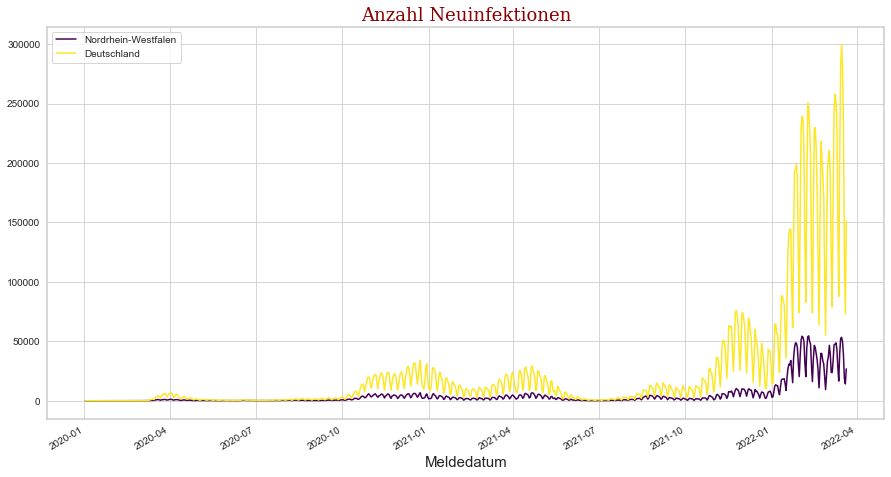

In [58]:
fig = covid[['Nordrhein-Westfalen', 'Deutschland']].plot(cmap='viridis', figsize=(15,8), sharey=True)
fig.set_title('Anzahl Neuinfektionen', fontdict=font)

### 10.2 Exploration (Corona Pandemie)

Sie werden die Daten aus der vorangegangenen Aufgabe in dieser Aufgabe analysieren. 

- Diese Aufgabe ist freier gehalten als die vorangegangene Aufgabe.


**Schritte**

(1) Importieren Sie die Daten.

(2) Untersuchen Sie die Daten: **Erzeugen Sie Fragen** an die Daten und notieren Sie sie hier.

(3) **Untersuchen** Sie Ihre Fragen mit den angegebenen Daten und **visualisieren** Sie bzw. **beschreiben** Sie Ihre Erkenntnisse.

- Hinweis: Ich lade Sie herzlich dazu ein, weitere Datenquellen aus dem Netz zu Ihren Untersuchungen hinzuziehen. Geben Sie in diesem Falle Ihre Datenquellen hier an.